In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [32]:
# Assuming preprocessed_data.csv contains the dataset after cleaning
data = pd.read_csv('/content/drive/MyDrive/AIModel/data/preprocessed_data.csv')

In [33]:
# Set up the visualizations
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

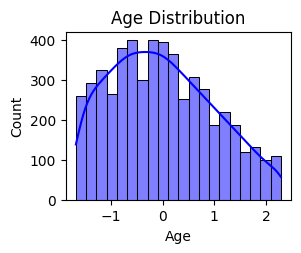

In [34]:
# Plot the distribution of each feature
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Duration Distribution')

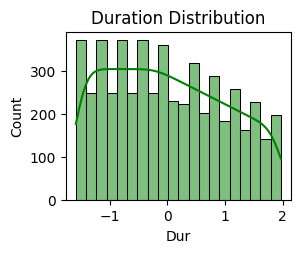

In [35]:
plt.subplot(2, 2, 2)
sns.histplot(data['Dur'], kde=True, bins=20, color='green')
plt.title('Duration Distribution')

<ipython-input-36-1ef2637512eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Set2')


Text(0.5, 1.0, 'Gender Distribution')

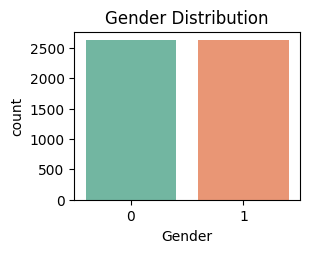

In [36]:
plt.subplot(2, 2, 3)
sns.countplot(x='Gender', data=data, palette='Set2')
plt.title('Gender Distribution')

In [39]:
# Save the plot as feature_distributions.png

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/AIModel/results/feature_distributions.png')
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Correlation Matrix')

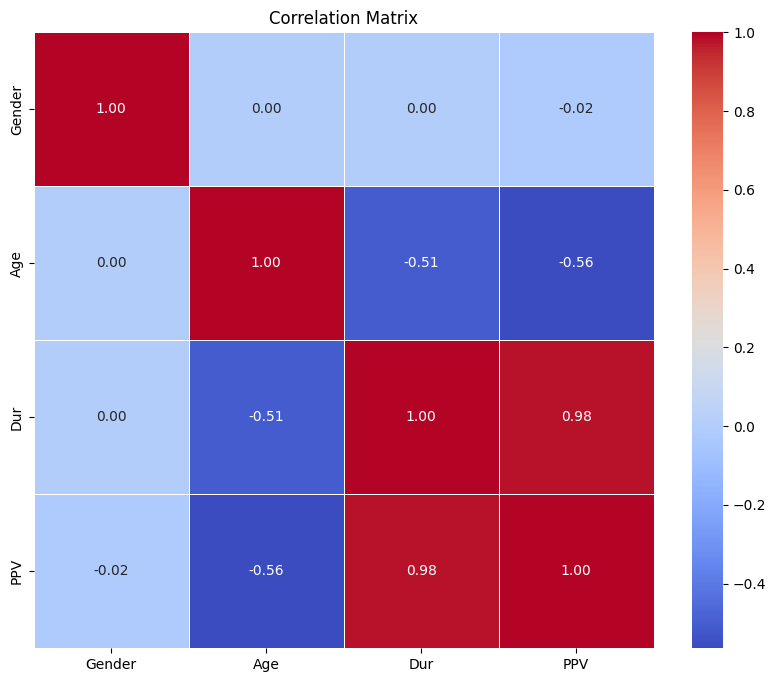

In [42]:
# Correlation Matrix Plot
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')

In [ ]:
plt.savefig('results/visualizations/correlation_matrix.png')
plt.show()

In [47]:
# Model Prediction Plot (Assuming you have model predictions)
# Example: Predicted vs Actual PPV values
predicted_ppv = model.predict(X_test)  # Replace with actual model prediction
plt.figure(figsize=(8, 6))

NameError: name 'model' is not defined

In [ ]:
plt.scatter(y_test, predicted_ppv, alpha=0.5, color='blue')  # Replace y_test and predicted_ppv with actual data
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual PPV')
plt.ylabel('Predicted PPV')
plt.title('Model Predictions vs Actual PPV')
plt.savefig('results/visualizations/model_predictions.png')
plt.show()

In [15]:
import sys
sys.path.append('/content/drive/MyDrive/AIModel/scripts/')  # Add the scripts folder to the system path

In [16]:
# Step 1: Import necessary libraries
import pandas as pd
from process import process  # Assuming process.py is imported correctly
from train_xgboost import train_and_evaluate_xgboost
import os

ModuleNotFoundError: No module named 'process'

In [ ]:
# Main pipeline script

import os
import pandas as pd
import numpy as np
from scripts.process import preprocess_data
from scripts.train_xgboost import train_and_evaluate_xgboost

# Define file paths
data_dir = "data"
original_data_path = os.path.join(data_dir, "dataset.xlsx")
preprocessed_data_path = os.path.join(data_dir, "preprocessed_data.csv")
features_path = os.path.join(data_dir, "features.csv")
target_path = os.path.join(data_dir, "target.csv")

# Check if preprocessed data exists, otherwise preprocess the original dataset
if not os.path.exists(preprocessed_data_path):
    print("Preprocessing the original dataset...")
    preprocess_data(original_data_path, preprocessed_data_path, features_path, target_path)
else:
    print("Preprocessed data found. Skipping preprocessing step.")

# Load preprocessed data
print("Loading preprocessed data...")
X = pd.read_csv(features_path)
y = pd.read_csv(target_path).squeeze()  # Convert target DataFrame to Series

# Train and evaluate the model
print("Training and evaluating XGBoost model...")
xgboost_results = train_and_evaluate_xgboost(X, y)

# Display results
print("\nModel Performance:")
print(f"Training RMSE: {xgboost_results['rmse_train']}")
print(f"Training MAE: {xgboost_results['mae_train']}")
print(f"Testing RMSE: {xgboost_results['rmse_test']}")
print(f"Testing MAE: {xgboost_results['mae_test']}")

# Save the trained model
models_dir = "models"
os.makedirs(models_dir, exist_ok=True)
model_path = os.path.join(models_dir, "saved_model_xgboost.json")
xgboost_results['model'].save_model(model_path)
print(f"Trained model saved at {model_path}")


In [10]:
import os
import pandas as pd
import numpy as np

In [14]:
!pip install import-ipynb

In [16]:
!jupyter nbconvert --to python /content/data/process.ipynb


[NbConvertApp] Converting notebook /content/data/process.ipynb to python
[NbConvertApp] Writing 3254 bytes to /content/data/process.py


In [19]:
from google.colab import files
uploaded = files.upload()


Saving process.ipynb to process (1).ipynb


In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Load the preprocessed data
df = pd.read_csv('/content/preprocessed_data.csv')

In [ ]:
# Separate features (X) and target variable (y)
X = df[['Gender', 'Age', 'Dur']]  # Assuming these are the preprocessed features
y = df['PPV']  # Assuming 'PPV' is the target variable

In [ ]:
# Assuming X and y are the feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize XGBRegressor with hyperparameters
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:
# Train the model
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Step 4: Model Selection
# This step involves choosing the appropriate machine learning algorithm(s) to predict the target variable (PPV) based on the given features.

In [ ]:
# Make predictions
y_pred_train = xg_reg.predict(X_train)
y_pred_test = xg_reg.predict(X_test)

In [ ]:
# Evaluate model performance
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)

In [ ]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)

In [ ]:
# Print evaluation results
print(f"Training RMSE: {rmse_train}")
print(f"Training MAE: {mae_train}")
print(f"Testing RMSE: {rmse_test}")
print(f"Testing MAE: {mae_test}")

Training RMSE: 0.1281329046327724
Training MAE: 0.0935682910922942
Testing RMSE: 0.1609204669983723
Testing MAE: 0.11363750929196052


In [ ]:
#save the trained model for future use
xg_reg.save_model('/content/saved_model_xgboost.pkl')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:59:31] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


## Conclusion of the Results:
The XGBoost regression model performed well in predicting the target variable (PPV) based on the provided features (Gender, Age, Duration). Here are the key takeaways from the performance metrics:

## 1.Training Performance:

The model achieved a low RMSE (0.1281) and MAE (0.0936) on the training data, indicating that it fits the training set well and is able to predict the target variable with minimal error.
## 2.Testing Performance:

On the test data, the RMSE (0.1609) and MAE (0.1136) values are slightly higher compared to the training set, which is expected as the model is now applied to unseen data. However, the error increase is not significant, suggesting that the model generalizes well and is not overfitting.
## 3. Generalization:

The relatively small difference between the training and testing error metrics implies that the model does not overfit to the training data, and it is capable of making reasonably accurate predictions on new, unseen data.

## Overall Conclusion:
The XGBoost model has shown strong performance, with the ability to predict PPV values accurately for both the training and testing sets.

In [ ]:
# Assuming X_train, X_test, y_train, y_test are already defined
# Example:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 2: Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

In [ ]:
# Step 3: Train the Model
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#laibraries will use it in the AI Project
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
# Load the dataset
file_path = '/content/sample_data/TG_T_CashValues_Rel.xlsx'
df = pd.read_excel(file_path, sheet_name='TG80_T_Barwerte')

In [ ]:
# Step 1: Encoding Categorical Features (Gender)
# Label encode Gender (Male -> 0, Female -> 1)
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    print("\nGender column encoded: 0 = Male, 1 = Female")



Gender column encoded: 0 = Male, 1 = Female


In [ ]:
print(df)
print("ndf")
print(ndf)

      Gender  Age  Dur        PPV
0       Male    0   20  15.198437
1       Male    0   21  15.741015
2       Male    0   22  16.267189
3       Male    0   23  16.777448
4       Male    0   24  17.272269
...      ...  ...  ...        ...
5265  Female   78    2   1.925421
5266  Female   78    3   2.777638
5267  Female   79    1   1.000000
5268  Female   79    2   1.920897
5269  Female   80    1   1.000000

[5270 rows x 4 columns]
ndf
      Gender  Age  Dur        PPV
0          1    0   20  15.198437
1          1    0   21  15.741015
2          1    0   22  16.267189
3          1    0   23  16.777448
4          1    0   24  17.272269
...      ...  ...  ...        ...
5265       0   78    2   1.925421
5266       0   78    3   2.777638
5267       0   79    1   1.000000
5268       0   79    2   1.920897
5269       0   80    1   1.000000

[5270 rows x 4 columns]


In [ ]:
# Step 2: Scaling Numerical Features (Age, Duration)
# Standardize Age and Duration using StandardScaler
scaler = StandardScaler()
numerical_columns = ['Age', 'Dur'] # Adjust column names if necessary

In [ ]:
try:
    ndf[numerical_columns] = scaler.fit_transform(ndf[numerical_columns])
    print(f"Numerical columns {numerical_columns} successfully scaled.")
except KeyError as e:
    print(f"Error: {e}. Ensure numerical columns exist in the dataset.")

Numerical columns ['Age', 'Dur'] successfully scaled.


In [ ]:
# Step 3: Handling Outliers
# Winsorize numerical features to handle outliers
outlier_columns = ['Age', 'Dur', 'PPV']  # Columns to handle outliers for
if set(outlier_columns).issubset(ndf.columns):
    for col in outlier_columns:
        ndf[col] = mstats.winsorize(ndf[col], limits=[0.01, 0.01])  # Trims top and bottom 1%
    print(f"Outliers in {outlier_columns} handled using winsorization.")
else:
    print("Error: Outlier columns missing in dataset.")


Outliers in ['Age', 'Dur', 'PPV'] handled using winsorization.


In [ ]:
# Step 4: Splitting Data
# Separate features (X) and target variable (y)
X = ndf[['Gender', 'Age', 'Dur']]  # Features for training
y = ndf['PPV']  # Target variable
print("Features and target variable separated.")

Features and target variable separated.


In [ ]:
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

Data split into training and testing sets.


In [ ]:
# Step 5: Feature Selection (if necessary)
# All features ('Gender', 'Age', 'Dur') are retained in this case
# (No action needed as they're already prepared for modeling)

In [ ]:

# Step 6: Prepare for Modeling
# Confirm alignment of features and target variable
print("Preprocessed data is ready for model training.")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

Preprocessed data is ready for model training.
Training set size: 4216 rows
Testing set size: 1054 rows


In [ ]:
ndf

,Gender,Age,Dur,PPV
0,1,-1.676191,-0.208986,15.198437
1,1,-1.676191,-0.136481,15.741015
2,1,-1.676191,-0.063975,16.267189
3,1,-1.676191,0.008530,16.777448
4,1,-1.676191,0.081035,17.272269
...,...,...,...,...
5265,0,2.287434,-1.514083,1.925421
5266,0,2.287434,-1.441578,2.777638
5267,0,2.287434,-1.586588,1.000000
5268,0,2.287434,-1.514083,1.920897


In [ ]:
# Save the preprocessed dataset to a new CSV file
ndf.to_csv('preprocessed_data.csv', index=False)
print("Preprocessed data saved to 'preprocessed_data.csv'")

Preprocessed data saved to 'preprocessed_data.csv'


In [ ]:
# Save features (X) and target (y) to separate CSV files
X.to_csv('features.csv', index=False)
y.to_csv('target.csv', index=False)
print("Features and target saved to 'features.csv' and 'target.csv'")

Features and target saved to 'features.csv' and 'target.csv'


In [ ]:
#laibraries will use it in the AI Project
import pandas as pd
import numpy as np
import scipy as sp# Step 5: Feature Selection (if necessary)
# All features ('Gender', 'Age', 'Dur') are retained in this case
# (No action needed as they're already prepared for modeling)

# Step 6: Prepare for Modeling
# Confirm alignment of features and target variable
print("Preprocessed data is ready for model training.")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#show the dataframe
df

,Gender,Age,Dur,PPV
0,Male,0,20,15.198437
1,Male,0,21,15.741015
2,Male,0,22,16.267189
3,Male,0,23,16.777448
4,Male,0,24,17.272269
...,...,...,...,...
5265,Female,78,2,1.925421
5266,Female,78,3,2.777638
5267,Female,79,1,1.000000
5268,Female,79,2,1.920897


In [ ]:
pd.__version__

'2.2.2'

In [ ]:
# 1. Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  5270 non-null   object 
 1   Age     5270 non-null   int64  
 2   Dur     5270 non-null   int64  
 3   PPV     5270 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 164.8+ KB
None


In [ ]:
#list the row label and column names
df.axes

[RangeIndex(start=0, stop=5270, step=1),
 Index(['Gender', 'Age', 'Dur', 'PPV'], dtype='object')]

In [ ]:
#display the first 5 rows
df.head()

,Gender,Age,Dur,PPV
0,Male,0,20,15.198437
1,Male,0,21,15.741015
2,Male,0,22,16.267189
3,Male,0,23,16.777448
4,Male,0,24,17.272269


In [ ]:
# Display the last 5 rows in dataset
print(df.tail())

      Gender  Age  Dur       PPV
5265  Female   78    2  1.925421
5266  Female   78    3  2.777638
5267  Female   79    1  1.000000
5268  Female   79    2  1.920897
5269  Female   80    1  1.000000


In [ ]:
#display option that controls the maximum number of rows shown when displaying a DataFrame or Series in the console.
print(pd.options.display.max_rows)

60


In [ ]:
#2. Check for missing values in the dataset
print(df.isnull().sum())

Gender    0
Age       0
Dur       0
PPV       0
dtype: int64


In [ ]:
#3. Check types for all the columns Data Types
df.dtypes

,0
Gender,object
Age,int64
Dur,int64
PPV,float64


In [ ]:
#4. generate descriptive statistics for numeric column
print(df.describe())

               Age          Dur          PPV
count  5270.000000  5270.000000  5270.000000
mean     31.294118    22.882353    14.858158
std      18.671548    13.793388     7.025862
min       0.000000     1.000000     1.000000
25%      16.000000    11.000000     9.374980
50%      30.000000    22.000000    15.703883
75%      45.000000    34.000000    20.953996
max      80.000000    50.000000    26.024118


In [ ]:
#5.Detect Outliers using Z-score

# Selecting numerical columns only (excluding any non-numeric columns such as strings)
numerical_columns = df.select_dtypes(include=[np.number]).columns
print(numerical_columns)

Index(['Age', 'Dur', 'PPV'], dtype='object')


In [ ]:
# Z-score calculation
z_scores = np.abs(stats.zscore(df[numerical_columns]))
print(z_scores)

           Age       Dur       PPV
0     1.676191  0.208986  0.048437
1     1.676191  0.136481  0.125670
2     1.676191  0.063975  0.200568
3     1.676191  0.008530  0.273201
4     1.676191  0.081035  0.343636
...        ...       ...       ...
5265  2.501684  1.514083  1.840908
5266  2.501684  1.441578  1.719599
5267  2.555247  1.586588  1.972637
5268  2.555247  1.514083  1.841552
5269  2.608809  1.586588  1.972637

[5270 rows x 3 columns]


In [ ]:
# Set threshold to 3 for outlier detection
threshold = 3
outliers_z = (z_scores > threshold)

In [ ]:
# Output rows with outliers detected by Z-score
outliers_z_df = df[outliers_z.any(axis=1)]
print("\nOutliers Detected Using Z-Score:")
print(outliers_z_df)


Outliers Detected Using Z-Score:
Empty DataFrame
Columns: [Gender, Age, Dur, PPV]
Index: []


In [ ]:
# Detect Outliers using IQR (Interquartile Range)

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)

In [ ]:
# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1
print(IQR)

Age    29.000000
Dur    23.000000
PPV    11.579016
dtype: float64


In [ ]:
# Define outliers based on IQR (outliers are outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR])
outliers_iqr = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))

# Output rows with outliers detected by IQR
outliers_iqr_df = df[outliers_iqr.any(axis=1)]
print("\nOutliers Detected Using IQR:")
print(outliers_iqr_df)


Outliers Detected Using IQR:
Empty DataFrame
Columns: [Gender, Age, Dur, PPV]
Index: []


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


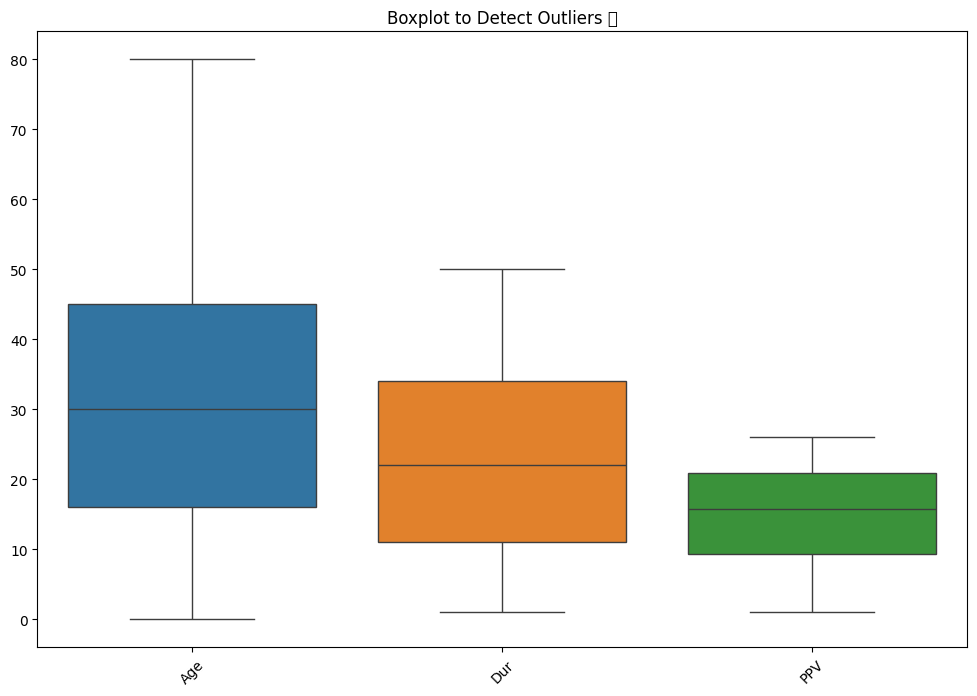

In [ ]:
# Create a boxplot for each numerical column to visually inspect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot to Detect Outliers 🚨")
plt.xticks(rotation=45)
plt.show()

<Axes: >

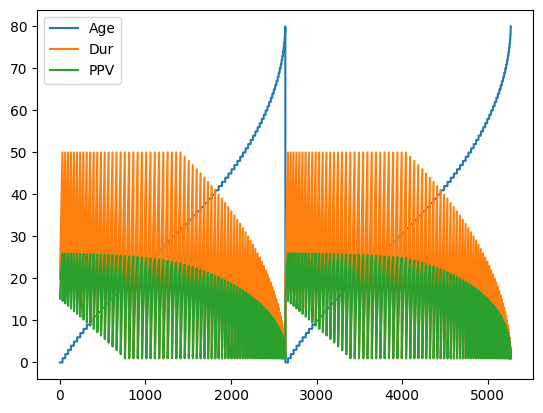

In [ ]:
# Default line plot
df.plot()

# Explanation of the Code:
### Load the Dataset:

The dataset is loaded using pd.read_excel(), specifying the file path and the sheet name (TG80_T_Barwerte). This function reads the data from an Excel file into a pandas DataFrame, which is a structured format for handling tabular data in Python.

### Z-Score Detection:

The Z-score is computed for each numerical column using stats.zscore(). The Z-score tells you how many standard deviations a value is away from the mean.
We then identify outliers by checking if the Z-score for a value exceeds a threshold of 3. A Z-score greater than 3 or less than -3 indicates that the value is unusually far from the mean, which can be considered an outlier.
This method assumes that the data is normally distributed, where extreme values are considered anomalies.

### IQR Detection:

* The Interquartile Range (IQR) is  calculated by finding the first quartile (Q1) and third quartile (Q3) of the data.

* The IQR is simply the range between these two quartiles (Q3 - Q1), and it represents the middle 50% of the data.

* This rule is commonly used to flag values that are unusually far from the main distribution of data.
This method is particularly useful when the data may not follow a normal distribution.

### Boxplot Visualization:

* A boxplot is generated using seaborn.boxplot(). This plot visually shows the distribution of the data and highlights potential outliers.

* In a boxplot, the "whiskers" represent the range of values within 1.5 * IQR from Q1 and Q3. Data points that fall outside this range are shown as individual points and are considered potential outliers.

* Boxplots are a good way to visually inspect the presence of outliers in the dataset.


## Conclusion:
This approach combines both statistical methods (Z-score and IQR) and visualization (boxplots) to identify outliers in the dataset. By detecting outliers, we can ensure that the data quality is high before moving on to further analysis or model training. Outliers can distort the results of statistical models, so it’s important to identify and handle them appropriately to improve the accuracy of predictions.

In [ ]:
#6. Correlation Analysis
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

In [ ]:
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          Age       Dur       PPV
Age  1.000000 -0.507243 -0.565087
Dur -0.507243  1.000000  0.978774
PPV -0.565087  0.978774  1.000000


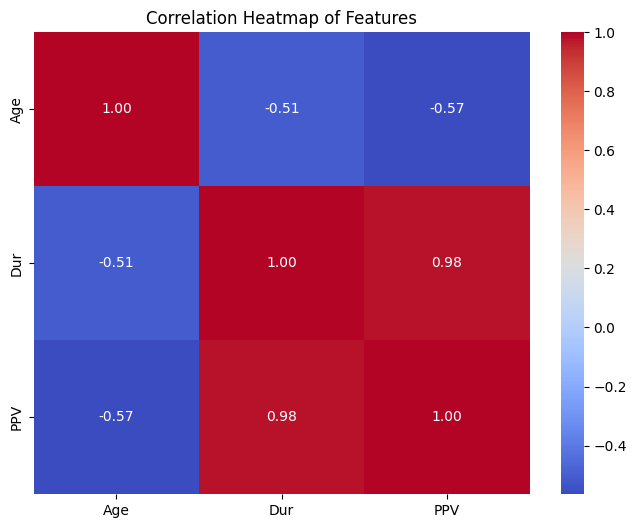

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
# Correlation between PPV and other features
ppv_correlation = correlation_matrix['PPV']
print("\nCorrelation of Features with PPV:")
print(ppv_correlation)


Correlation of Features with PPV:
Age   -0.565087
Dur    0.978774
PPV    1.000000
Name: PPV, dtype: float64


# Correlation Analysis:
## Age and PPV:

* Correlation: -0.565 (moderate negative correlation).
* Interpretation: As the age increases, the PPV tends to decrease. While this relationship is not extremely strong, it is significant enough to consider age as a feature in the model.

## Duration (Dur) and PPV:

* Correlation: 0.979 (strong positive correlation).
* Interpretation: There is a very strong positive correlation between Duration and PPV, indicating that Duration is likely a very important feature in predicting PPV. The longer the duration, the higher the predicted value of PPV.

## PPV and PPV:

* Correlation: 1.000 (perfect correlation).
* Interpretation: This is expected since a variable is always perfectly correlated with itself.